In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

from pandas import DataFrame, Series
from pandas_datareader import data as pdr

# Needs to be done in order for pandas yahoo finance to work
yf.pdr_override()

In [70]:
# Here type the investment attributes
every_month_inv = 100
stocks = ['SPY']
years = 10

In [71]:
def get_data(stocks, start, end):
    return pdr.get_data_yahoo(stocks, start, end) 

[*********************100%***********************]  1 of 1 completed


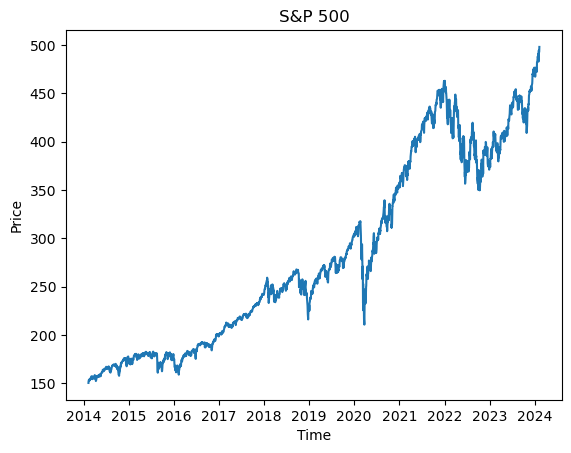

In [72]:
start = (datetime.datetime.now() - datetime.timedelta(days=365*years)).replace(hour=0, minute=0, 
                                                                            second=0, microsecond=0)
end = datetime.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

data = get_data('SPY', start, end)
plt.plot(data['Adj Close'])
plt.title('S&P 500')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [73]:
data['time_start'] = data.index
data['time_start'] = data['time_start'].apply(lambda x : pd.to_datetime(str(x).split(' ')[0]))
data.index = data['time_start']

date_range = pd.date_range(start, end, freq='BMS')
date_range = date_range[date_range.isin(data.index)]

inv_periods = data.loc[date_range]['Adj Close']
current_price = data.iloc[-1]['Adj Close']

invest_points = current_price / inv_periods
invest_points = every_month_inv * invest_points

investment = round(invest_points.sum(), 2)
money_inv = (every_month_inv * len(date_range))
perc_inv = investment / money_inv
perc_inv_ann = perc_inv**(1/years)

perc_inv = round((perc_inv - 1)*100, 1)
perc_inv_ann = round((perc_inv_ann - 1)*100, 2)

print("Investment:", investment, "Total money invested:", money_inv, "\nPercentage return", perc_inv, 
     "anually:", perc_inv_ann)

Investment: 21267.46 Total money invested: 10800 
Percentage return 96.9 anually: 7.01


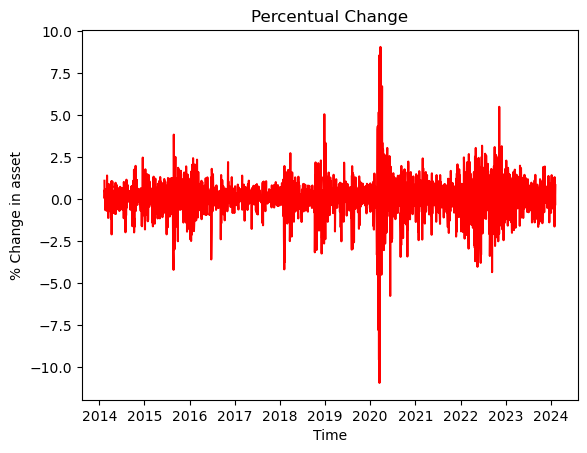

In [74]:
arr = np.array(data['Adj Close'])
index = data.index
prc_chng = ((arr[1:] / arr[:-1])-1)*100

plt.plot(pd.Series(prc_chng, index=index[1:]), color='red')
plt.title('Percentual Change')
plt.xlabel('Time')
plt.ylabel('% Change in asset')
plt.show()

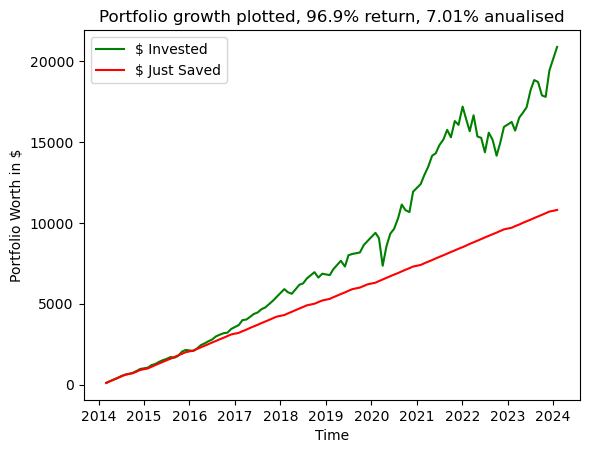

In [76]:
arr = np.array(inv_periods)
index = inv_periods.index
prc_chng = arr[1:] / arr[:-1]

prtfl = [every_month_inv]
for i in range(len(prc_chng)):
    app = prtfl[i]*prc_chng[i]+every_month_inv
    prtfl.append(app)
    
investment = np.array(list(range(1, len(prtfl)+1)))
investment = investment * every_month_inv
    
plt.plot(index, prtfl, color='green')
plt.plot(index, investment, color='red')
plt.title('Portfolio growth plotted, {}% return, {}% anualised'.format(perc_inv, perc_inv_ann))
plt.xlabel('Time')
plt.ylabel('Portfolio Worth in $')
plt.legend(['$ Invested', '$ Just Saved'], loc='best')
plt.show()